Movie Recommeneder System

Imported the required libraries for performing the task such as importing and storing of files. Pandas and numpy helps us to present the parameter of the files and to set the files so that the further operation can be performed



In [ ]:
import pandas as pd
import numpy as np

column_names = ['user_id','item_id','ratings','timestamp']
df = pd.read_csv("/content/u (2).data", sep = "\t", names = column_names)

We have created a data frame which contain the value of the movie files and the values are user_id, item_id, ratings of the movie, their timestamp.

In [ ]:
df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Created another data frame which will contain csv file storing the name of the movies


In [ ]:
df2 = pd.read_csv("/content/Movie_Id_Titles [MConverter.eu].csv")
df2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merged both the data frame df & df2 with respect to their item_id and store their value in the new data frame (df3)

In [ ]:
df3 = pd.merge(df,df2, on="item_id")
df3.head()

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


EDA (Estimated Data Analysis) is a crucial step in data exploration, involving techniques like visualization, summary statistics, and hypothesis testing to understand data characteristics, identify patterns, and detect anomalies. It helps in making informed decisions and guiding further analysis in fields such as statistics, machine learning, and data science.

We have imported the libraries such as matplotlib, seaborn for the visualization of the data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

We will create a rating dataframe with Average rating and number of ratings

In [ ]:
df3.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: ratings, dtype: float64

Titles with their ratings in descending order

In [ ]:
df3.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

A new data frame named "ratings" which will contain the title of the movie and their average ratings

In [ ]:
ratings = pd.DataFrame(df3.groupby('title')['ratings'].mean())
ratings.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now we will add the new column in the ratings data frame named as 'num of rating' which will contain the number of ratings

In [ ]:
ratings['num of ratings'] = pd.DataFrame(df3.groupby('title')['ratings'].count())
ratings.head()

,ratings,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now a few Histogram


Histogram visuals of the rating dataframe with refrence to the num of rating

<Axes: >

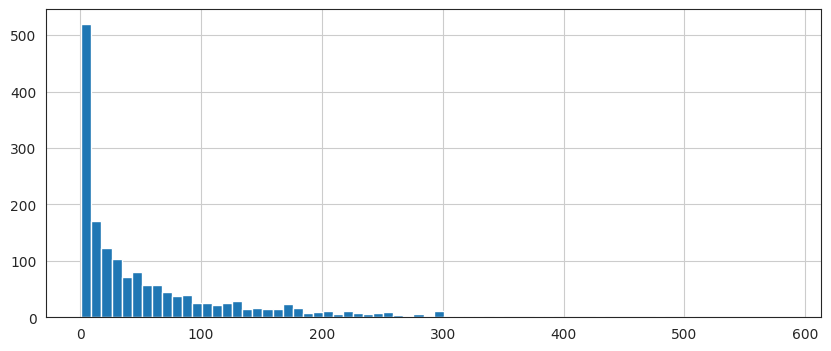

In [ ]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

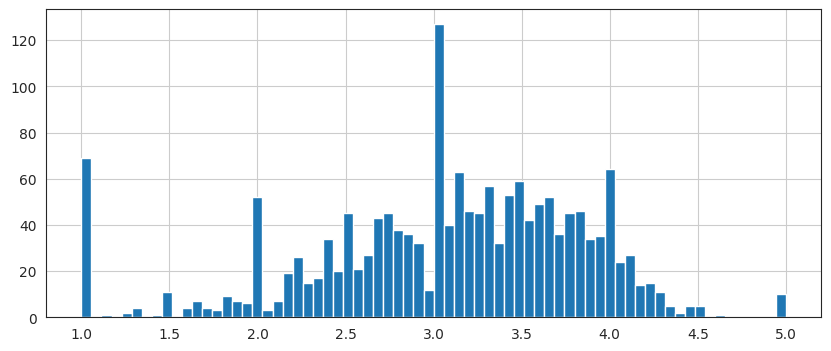

In [ ]:
plt.figure(figsize=(10,4))
ratings['ratings'].hist(bins=70)

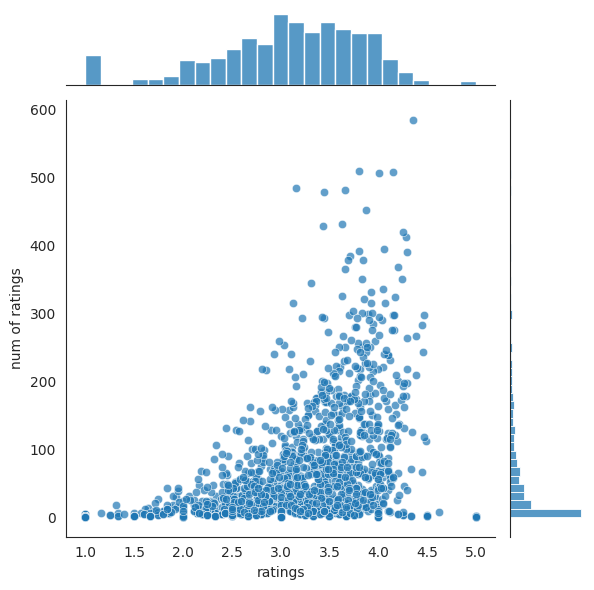

In [ ]:
sns.jointplot(x = 'ratings', y ='num of ratings', data=ratings, alpha =0.7)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

**Recommending Similar Movies**
Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

Will create a pivot table of df3 data frame

In [ ]:
moviemat = df3.pivot_table(index="user_id", columns = "title", values ="ratings")
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sort the values of 'num of ratings' in descending order

In [ ]:
ratings.sort_values('num of ratings',ascending = False).head(10)

,ratings,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Now we will select any two movie out of these

In [ ]:
star_wars_user_ratings = moviemat['Star Wars (1977)']
Scream_user_ratings = moviemat['Scream (1996)']
star_wars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [ ]:
Scream_user_ratings.head()

user_id
0    NaN
1    NaN
2    3.0
3    2.0
4    4.0
Name: Scream (1996), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [ ]:
similiar_to_star_wars = moviemat.corrwith(star_wars_user_ratings)
similiar_to_Scream = moviemat.corrwith(Scream_user_ratings)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Movies related to the star wars is store in the data frame corr_starwar which will contain the titles of those movies and their correlation values

In [ ]:
corr_starwar = pd.DataFrame(similiar_to_star_wars, columns = ['correlation'])
corr_starwar.dropna(inplace = True)
corr_starwar.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


sorting the values of corr_starwar in descending order

In [ ]:
corr_starwar.sort_values("correlation", ascending = False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Now, we will join the column num of ratings

In [ ]:
corr_starwar = corr_starwar.join(ratings['num of ratings'])
corr_starwar.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


So these are the movies which should be recommended after you watch Star Wars.

In [ ]:
corr_starwar[corr_starwar['num of ratings']>100].sort_values('correlation',ascending = False,).head()

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the movie that you should watch after watching Scream is

In [ ]:
corr_scream = pd.DataFrame(similiar_to_Scream, columns=["correlation"])
corr_scream.dropna()
corr_scream.head()

,correlation
title,
'Til There Was You (1997),0.454859
1-900 (1994),-0.944911
101 Dalmatians (1996),0.124059
12 Angry Men (1957),-0.025659
187 (1997),0.382836


In [ ]:
corr_scream = corr_scream.sort_values('correlation', ascending = False).head()
corr_scream.head()

,correlation
title,
Love and Death on Long Island (1997),1.0
Turbo: A Power Rangers Movie (1997),1.0
Caro Diario (Dear Diary) (1994),1.0
Time Tracers (1995),1.0
Infinity (1996),1.0


In [ ]:
corr_scream = corr_scream.join(ratings['num of ratings'])
corr_scream.head()

,correlation,num of ratings
title,,
Love and Death on Long Island (1997),1.0,2
Turbo: A Power Rangers Movie (1997),1.0,5
Caro Diario (Dear Diary) (1994),1.0,4
Time Tracers (1995),1.0,2
Infinity (1996),1.0,6


In [ ]:
corr_scream[corr_scream['num of ratings']>0].sort_values('correlation', ascending = False,).head()

,correlation,num of ratings
title,,
Love and Death on Long Island (1997),1.0,2
Turbo: A Power Rangers Movie (1997),1.0,5
Caro Diario (Dear Diary) (1994),1.0,4
Time Tracers (1995),1.0,2
Infinity (1996),1.0,6
